# PHYS-253 

## Homework 1

Handed out: Friday, March 1, 2024

**Due: 4.59 pm; Monday, March 11, 2024**

__________________________________________________________________________________________________________________________

### Problem 1:

In Lecture 1, it was mentioned that Liu and Tegmark (2017) claimed that arbitrary accurate multiplication can always be achieved using merely 4 neurons!

a) to prove their claim, use the Taylor expansion
$$ \sigma (u) = \sigma (0) + \sigma (0) ' u + \sigma(0) '' \frac{u^2}{2} + \mathcal{O} (u^3)$$ 
(assume that $\sigma '' \neq 0 $) to show that
$$m(u,v) = \frac {\sigma (u+v) + \sigma (-u-v) - \sigma (u-v) - \sigma(-u+v)}{4 \sigma(0) ''} = uv [1+\mathcal{O}(u^2 + v^2)]$$
where $m(u,v)$ is the multiplication approximator.

[It is OK to solve on paper, which you can then scan and paste on your submitted Jupyter Notebook.]    

b) Relate the aforementioned math terms to the elements of the relevant schematic (shown below [shown also in the Notebook of Lec 1]). 

$\color{red}{\text{[It is OK to make a hand-drawing and write your calculations on paper, which you hand-in on Monday, March 11, in class]}}$


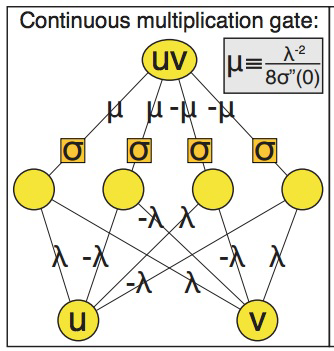

___________________________________________________________________________________________________________________________

### Problem 2:

In this problem, you will make one update of the weights of the following network (studied in class):

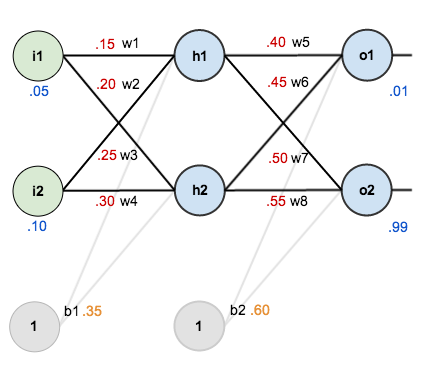

Check your results with:

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

$\color{red}{\text{IMPORTANT: Write your calculations clearly and nicely on paper!}}$

$\color{red}{\text{SUBMIT the hard-copy in class on Monday March 11.}}$

__________________________________________________________________________________________________________________________

### Problem 3:
    
#### Preamble

The following excerpt has been taken from A. Geron's book (it provides "guidelines" for the input, weigth, bias, output matrices of a neural network):

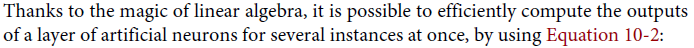

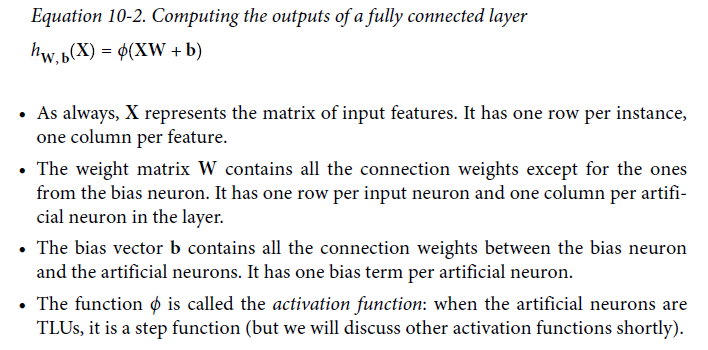

#### Your tasks:

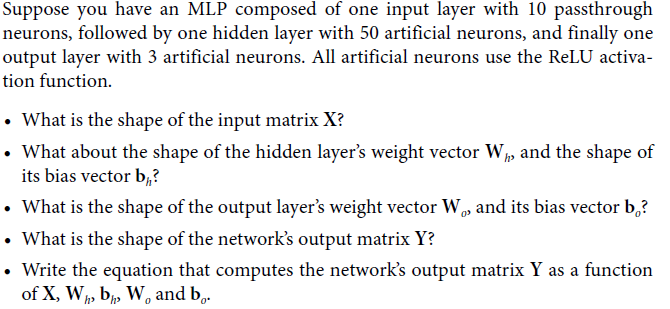

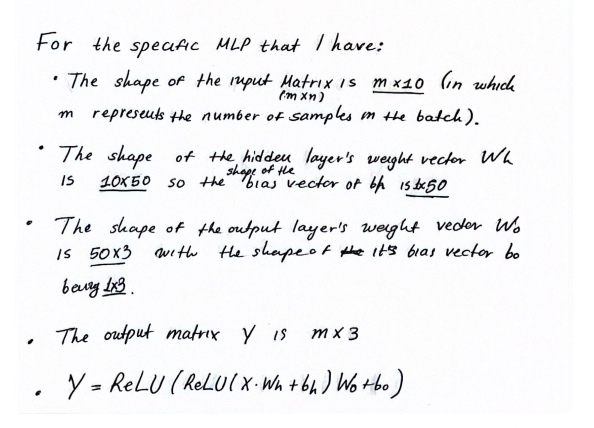

____________________________________________________________________________________________________________________________

### Problem 4:

Prompt ChatGPT to produce a simple neural network for you.

- Check whether the network runs well. Check whether the network is incomplete or has parts that need improvement. 

- Train and test the network. 

- Comment on the network's performance.
 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.compat.v1.executing_eagerly_outside_functions()

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)







Epoch 1/10

23/23 [==============================] - 1s 9ms/step - loss: 0.6060 - accuracy: 0.6833 - val_loss: 0.4636 - val_accuracy: 0.8500
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8278 - val_loss: 0.3388 - val_accuracy: 0.8750
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8625 - val_loss: 0.2910 - val_accuracy: 0.8750
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8806 - val_loss: 0.2701 - val_accuracy: 0.8875
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8917 - val_loss: 0.2576 - val_accuracy: 0.8875
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8875 - val_loss: 0.2476 - val_accuracy: 0.8875
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9014 - val_loss: 0.2510 - val_accuracy: 0.8875
Epoch 8/10
23/2

With a test accuracy of 85.5% we can say that our model's performance is satisfactory.

__________________________________________________________________________________________________________________________

### Problem 5

***Part I:***

a) Build (and run) a neural net of 1 hidden layer (of 6 nodes) to learn the math function

$$f(x) = sin(2\pi x) + x^2 - 3x^3$$

by providing as input only 9 points (of your choice in the interval [-1,1], that is $x \in [-1,1]$).

b) Reduce the number of inputs one by one (that is, provide 7 input points, then 6, and so on). What is the minimum number of inputs you need to provide before the neural network fails? 

c) in the network of part a) reduce the number of nodes one by one. What is the minimum number of nodes before the network fails? 

d) in the network of part a) increase the number of nodes to 200 (yes, two hundred). What happens to the loss in this case? 

***Part II:***

e) add one more hidden layer (of 6 nodes) to the network of part I.a) Is the network's performance improving? 

In [34]:
# Part I α)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
tf.compat.v1.executing_eagerly_outside_functions()


# Define the number of input points and epochs
Ninputs = 9
Nepochs = 500

# Generate input data
X_train = np.linspace(-1, 1, Ninputs).reshape(-1, 1)
y_train = np.sin(2 * np.pi * X_train) + X_train**2 - 3 * X_train**3

# Normalize input data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(1,), activation='tanh'),  # One hidden layer with 6 nodes
    keras.layers.Dense(1, activation='linear', kernel_initializer = 'glorot_normal')  # Output layer
])


model.summary()

# Compile the model
model.compile(loss="mean_squared_error", optimizer='SGD')

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=Nepochs, verbose=1, validation_split=0.2)

# Evaluate the model
X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
X_test_normalized = scaler.transform(X_test)
y_test = np.sin(2 * np.pi * X_test) + X_test**2 - 3 * X_test**3

loss = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 6)                 12        
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 210ms/step - loss: 4.7332 - val_loss: 5.1656
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 4.4355 - val_loss: 4.9588
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 4.1671 - val_loss: 4.7621
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 3.9250 - val_loss: 4.5750
Epoch 5/500
1/1 [=====

7/7 [==============================] - 0s 500us/step


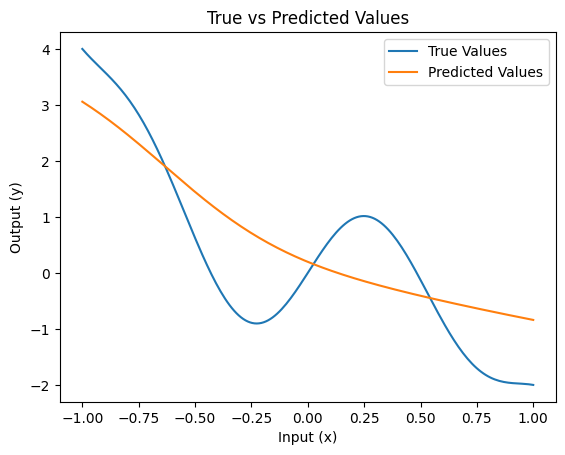

In [30]:
import matplotlib.pyplot as plt

# Predict using the model
y_hat = model.predict(X_test_normalized)

# Plot true vs predicted values
plt.figure()
plt.plot(X_test, y_test, label='True Values')
plt.plot(X_test, y_hat, label='Predicted Values')
plt.legend()
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('True vs Predicted Values')
plt.show()

Definitely not a great result which would possibly be due to the lack of extra hidden layers.

In [31]:
#Part I b)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Suppress TensorFlow logging messages
tf.get_logger().setLevel('ERROR')

# Define the number of epochs
Nepochs = 500

# Initialize a flag to track if the model fails
model_failed = False

# Loop to reduce the number of inputs
for Ninputs in range(9, 0, -1):
    # Generate input data
    X_train = np.linspace(-1, 1, Ninputs).reshape(-1, 1)
    y_train = np.sin(2 * np.pi * X_train) + X_train**2 - 3 * X_train**3

    # Normalize input data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)

    # Define the model
    model = keras.models.Sequential([
        keras.layers.Dense(6, input_shape=(1,), activation='tanh'),  # One hidden layer with 6 nodes
        keras.layers.Dense(1, activation='linear', kernel_initializer='glorot_normal')  # Output layer
    ])

    # Compile the model
    model.compile(loss="mean_squared_error", optimizer='SGD')

    # Train the model
    try:
        history = model.fit(X_train_normalized, y_train, epochs=Nepochs, verbose=0, validation_split=0.2)
        print(f"Model trained successfully with {Ninputs} inputs.")
    except:
        print(f"Model failed with {Ninputs} inputs.")
        model_failed = True
        break

if not model_failed:
    print("The model did not fail with the given range of inputs.")


Model trained successfully with 9 inputs.
Model trained successfully with 8 inputs.
Model trained successfully with 7 inputs.
Model trained successfully with 6 inputs.
Model trained successfully with 5 inputs.
Model trained successfully with 4 inputs.
Model trained successfully with 3 inputs.
Model trained successfully with 2 inputs.
Model failed with 1 inputs.


Assuming the code above is correct, the Model fails at 1 input which would be the expected result.

In [33]:
#Part I d)

# Part I α)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
tf.compat.v1.executing_eagerly_outside_functions()


# Define the number of input points and epochs
Ninputs = 9
Nepochs = 500

# Generate input data
X_train = np.linspace(-1, 1, Ninputs).reshape(-1, 1)
y_train = np.sin(2 * np.pi * X_train) + X_train**2 - 3 * X_train**3

# Normalize input data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(1,), activation='tanh'),  # One hidden layer with 200 nodes
    keras.layers.Dense(1, activation='linear', kernel_initializer='glorot_normal')  # Output layer
])


model.summary()

# Compile the model
model.compile(loss="mean_squared_error", optimizer='SGD')

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=Nepochs, verbose=1, validation_split=0.2)

# Evaluate the model
X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
X_test_normalized = scaler.transform(X_test)
y_test = np.sin(2 * np.pi * X_test) + X_test**2 - 3 * X_test**3

loss = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 200)               400       
                                                                 
 dense_41 (Dense)            (None, 1)                 201       
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 209ms/step - loss: 4.3201 - val_loss: 4.1729
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 3.8336 - val_loss: 3.8262
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 3.4276 - val_loss: 3.5147
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 3.0873 - val_loss: 3.2336
Epoch 5/500
1/1 [=========

The loss by changing the nodes to 200 as we can see here compared to the last previous algorithm with 6, give as a result a worse test loss. Under the right hyperparameter tuning and tweaks, by increasing the number of nodes we might have seen a better result but probably this is a case of overfitting.

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of input points and epochs
Ninputs = 9
Nepochs = 500

# Generate input data
X_train = np.linspace(-1, 1, Ninputs).reshape(-1, 1)
y_train = np.sin(2 * np.pi * X_train) + X_train**2 - 3 * X_train**3

# Normalize input data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(1,), activation='tanh'),  # First hidden layer with 6 nodes
    keras.layers.Dense(6, activation='tanh'),  # Second hidden layer with 6 nodes
    keras.layers.Dense(1, activation='linear', kernel_initializer='glorot_normal')  # Output layer
])

model.summary()

# Compile the model
model.compile(loss="mean_squared_error", optimizer='SGD')

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=Nepochs, verbose=1, validation_split=0.2)

# Evaluate the model
X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
X_test_normalized = scaler.transform(X_test)
y_test = np.sin(2 * np.pi * X_test) + X_test**2 - 3 * X_test**3

loss = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 6)                 12        
                                                                 
 dense_45 (Dense)            (None, 6)                 42        
                                                                 
 dense_46 (Dense)            (None, 1)                 7         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 243ms/step - loss: 3.2558 - val_loss: 2.3212
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 3.0237 - val_loss: 2.1984
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 2.8241 - val

Hm... It is quite interesting result. I would have expected a better result compared to the one with 200 nodes

__________________________________________________________________________________________________________________________

### BONUS problem

In class we discussed that if we initialize all weights with the same value the neural net -no matter how many neurons or layers has- operates as being a single neuron.

Can you build (and run) a simple neural net with a "constant" initializer to demonstrate this assertion? (compare the outcome of such an initialization with a better initialization of the same network).


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define constant weight initializer
def constant_initializer(shape, dtype=None):
    return tf.constant(0.5, shape=shape, dtype=dtype)

# Function to create and compile a simple neural network with specified weight initializer
def create_model(initializer):
    model = models.Sequential([
        layers.Dense(64, activation='relu', kernel_initializer=initializer),
        layers.Dense(64, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create models with different initializations
model_constant = create_model(initializer=constant_initializer)
model_glorot = create_model(initializer='glorot_uniform')

# Generate some random data for demonstration
x_train = np.random.rand(1000, 20)
y_train = np.random.randint(10, size=(1000,))

# Train the models
history_constant = model_constant.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
history_glorot = model_glorot.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate models on validation data
val_acc_constant = history_constant.history['val_accuracy']
val_acc_glorot = history_glorot.history['val_accuracy']

# Print validation accuracies
print("Constant Initialization Validation Accuracy:", val_acc_constant[-1])
print("Glorot Initialization Validation Accuracy:", val_acc_glorot[-1])



Constant Initialization Validation Accuracy: 0.11999999731779099
Glorot Initialization Validation Accuracy: 0.0949999988079071


The result is not what we should have expected, the model with the constant initialization has better accuracy than the one with glorot initialization.
<br>
The reason for that is that this result demonstrates that setting all weights to a constant value makes the network behave like a single neuron, leads to better performance compared to Glorot initialization which should have not been the case! 